In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from keras.layers import BatchNormalization
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
(X_train, y_train), (X_test,y_test) = datasets.cifar10.load_data()
X_train.shape

170498071/170498071 [==============================] - 4s 0us/step


(50000, 32, 32, 3)

In [ ]:
X_test.shape

(10000, 32, 32, 3)

In [ ]:
# Normalizing the dataset
X_train=(X_train)/255
X_test=(X_test)/255

In [ ]:
X_train

array([[[[0.23137255, 0.24313725, 0.24705882],
         [0.16862745, 0.18039216, 0.17647059],
         [0.19607843, 0.18823529, 0.16862745],
         ...,
         [0.61960784, 0.51764706, 0.42352941],
         [0.59607843, 0.49019608, 0.4       ],
         [0.58039216, 0.48627451, 0.40392157]],

        [[0.0627451 , 0.07843137, 0.07843137],
         [0.        , 0.        , 0.        ],
         [0.07058824, 0.03137255, 0.        ],
         ...,
         [0.48235294, 0.34509804, 0.21568627],
         [0.46666667, 0.3254902 , 0.19607843],
         [0.47843137, 0.34117647, 0.22352941]],

        [[0.09803922, 0.09411765, 0.08235294],
         [0.0627451 , 0.02745098, 0.        ],
         [0.19215686, 0.10588235, 0.03137255],
         ...,
         [0.4627451 , 0.32941176, 0.19607843],
         [0.47058824, 0.32941176, 0.19607843],
         [0.42745098, 0.28627451, 0.16470588]],

        ...,

        [[0.81568627, 0.66666667, 0.37647059],
         [0.78823529, 0.6       , 0.13333333]

In [ ]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [ ]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
cnn.fit(X_train, y_train, epochs=10,batch_size=32)

Epoch 1/10
1563/1563 [==============================] - 18s 4ms/step - loss: 1.4536 - accuracy: 0.4809
Epoch 2/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.0827 - accuracy: 0.6194
Epoch 3/10
1563/1563 [==============================] - 7s 4ms/step - loss: 0.9564 - accuracy: 0.6676
Epoch 4/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.8687 - accuracy: 0.6990
Epoch 5/10
1563/1563 [==============================] - 7s 4ms/step - loss: 0.8020 - accuracy: 0.7218
Epoch 6/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.7492 - accuracy: 0.7407
Epoch 7/10
1563/1563 [==============================] - 7s 5ms/step - loss: 0.6944 - accuracy: 0.7577
Epoch 8/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.6456 - accuracy: 0.7754
Epoch 9/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.6031 - accuracy: 0.7894
Epoch 10/10
1563/1563 [==============================] - 7s 4ms/step - loss: 0.56

In [ ]:
loss,accuracy=cnn.evaluate(X_test,y_test)
print("The accuracy is ",accuracy)

313/313 [==============================] - 1s 2ms/step - loss: 0.9779 - accuracy: 0.6900
The accuracy is  0.6899999976158142


In [ ]:
"""from sklearn.metrics import classification_report
report=classification_report(y_test,)"""

In [ ]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [ ]:
"""def plot_sample(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])"""

In [ ]:
import cv2
from google.colab.patches import cv2_imshow

Enter the path of the image to be predicted:/content/frog.png


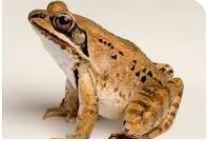

1/1 [==============================] - 0s 19ms/step
Predicted class: frog


In [ ]:
# Making  a predictive system
input_image_path=input('Enter the path of the image to be predicted:')

input_image=cv2.imread(input_image_path)
input_image_resize=cv2.resize(input_image,(32,32))
input_image_resize = cv2.cvtColor(input_image_resize, cv2.COLOR_BGR2RGB)
input_image_scaled=input_image_resize/255.
input_image_reshaped=np.reshape(input_image_scaled,[1,32,32,3])
cv2_imshow(input_image)
input_prediction=cnn.predict(input_image_reshaped)

input_pred_label=np.argmax(input_prediction)

predicted_class_label = classes[input_pred_label]

print("Predicted class:", predicted_class_label)